In [131]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

# execl 파일 불러오기 - read_excel(경로), 제목행 1행부터 읽기
not_exercise = pd.read_excel("./datas/exercise_seoul.xlsx", header=1) # header가 1행부터 보이게
not_exercise

not_exercise.columns
# '시점' 열(속성) 삭제 - drop()
not_exercise.drop(columns='시점', inplace=True)
not_exercise
# 칼럼 이름 변경 - 구분별(1) -> 대분류, 구분별(2) -> 분류
not_exercise.rename(columns={'구분별(1)':'대분류', '구분별(2)':'분류'}, inplace = True)
not_exercise

# 행삭제 - 22행~51행 삭제
not_exercise.drop(index=range(22, 52), inplace=True)
not_exercise

# index 2번 NaN -> 성별 수정
not_exercise.loc[2, '대분류'] = '성별'
not_exercise

# 연령별
for i in range(4, 10):
    not_exercise.loc[i, '대분류'] = '연령별'
not_exercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,연령별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


In [159]:
not_exercise['대분류'] == '성별'
not_exercise

#성별 데이터만 선택
not_exercise[not_exercise['대분류']=='성별']

#원본 유지하고 복사 - 깊은 복사 .copy()
not_ex_gender = not_exercise[not_exercise['대분류']=='성별'].copy()
not_ex_gender

#대분류 칼럼삭제
# not_ex_gender.drop(columns='대분류', inplace=True)
not_ex_gender = not_ex_gender.drop(columns='대분류', axis=1)
not_ex_gender

# 인덱스를 '분류'로 설정
# not_ex_gender.set_index('분류', inplace=True)
# not_ex_gender

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,여자,42.5,5.6,3.9,41.0,5.4,1.7


Text(0, 0.5, '')

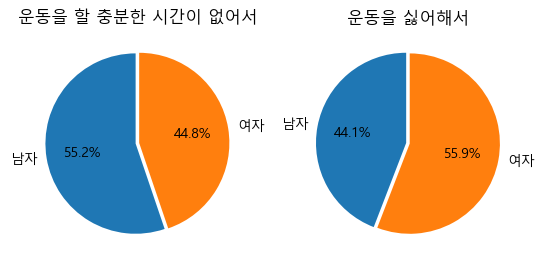

In [127]:
import matplotlib.pyplot as plt

# fig(figure : 그래프를 그릴 공간), ax(axis-그 공간 중 내가 사용할 부분)
fig, ax = plt.subplots(1, 2)  # subplots() - 작은 그래프(1행 2열)
explode = [0.02, 0.02] # 파이 간 간격
plt.rc('font', family='Malgun Gothic')
not_ex_gender['운동을 할 충분한 시간이 없어서'].plot.pie(ax=ax[0],
                autopct='%.1f%%', startangle=90, explode=explode)
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('') #ylabe 비우기
not_ex_gender['운동을 싫어해서'].plot.pie(ax=ax[1],
                autopct='%.1f%%', startangle=90, explode=explode)
ax[1].set_title('운동을 싫어해서')
ax[1].set_ylabel('')